490
3509
a) The diameter below the thundercloud of the region before the vertical component of the electric field changes sign is: 15095m
b) The volume of air of the half ellipsoid is : 477226825996.0886 m^3 or 477.2268259960886km^3


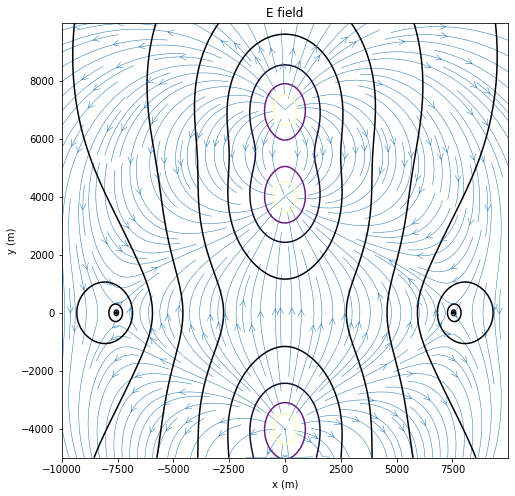

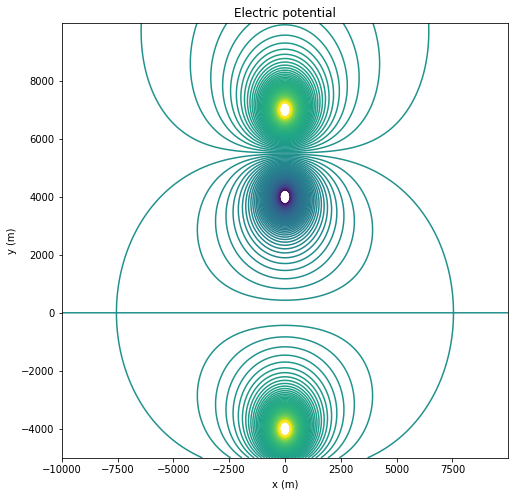

In [93]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


np.seterr(divide='ignore', invalid='ignore')
epsilon0=8.854187817*10**-12



x=np.arange(-10000,10000,5)
y=np.arange(-5000,10000,5)
xx,yy=np.meshgrid(x,y)

#Electric field x and y components (need to use method of images to simulate earth as conductive flat surface)
Ex= 1/(4*np.pi*epsilon0)*30*xx/(np.sqrt((xx)**2+(yy-7000)**2))**3+1/(4*np.pi*epsilon0)*-30*xx/(np.sqrt((xx)**2+(yy-4000)**2))**3+   1/(4*np.pi*epsilon0)*30*xx/(np.sqrt((xx)**2+(yy+4000)**2))**3+ 1/(4*np.pi*epsilon0)*-30*xx/(np.sqrt((xx)**2+(yy+7000)**2))**3
Ey= 1/(4*np.pi*epsilon0)*30*(yy-7000)/(np.sqrt((xx)**2+(yy-7000)**2))**3+1/(4*np.pi*epsilon0)*-30*(yy-4000)/(np.sqrt((xx)**2+(yy-4000)**2))**3 + 1/(4*np.pi*epsilon0)*30*(yy+4000)/(np.sqrt((xx)**2+(yy+4000)**2))**3  + 1/(4*np.pi*epsilon0)*-30*(yy+7000)/(np.sqrt((xx)**2+(yy+7000)**2))**3
figure(1,figsize=(8,8))
plt.streamplot(x,y,Ex,Ey,linewidth=0.5, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1.5)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('E field')
plt.contour(xx,yy,np.sqrt(Ex**2+Ey**2),levels=[0,5,10,10**1.5,10**2,10**2.5,10**3,10**3.5,10**4,10**4.5,10**5,10**5.5,10**6],cmap='magma')

#Electric potential
V=1/(4*np.pi*epsilon0)*30/(np.sqrt((xx)**2+(yy-7000)**2))+1/(4*np.pi*epsilon0)*-30/(np.sqrt((xx)**2+(yy-4000)**2))+1/(4*np.pi*epsilon0)*30/(np.sqrt((xx)**2+(yy+4000)**2))+1/(4*np.pi*epsilon0)*-30/(np.sqrt((xx)**2+(yy+7000)**2))

figure(2,figsize=(8,8))
plt.contour(xx,yy,V,levels=range(-10**9,10**9,10**7))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric potential')

#5a
for i in np.arange(0,len(x)-1):
    if Ey[1000][i]*Ey[1000][i+1] <0:
        print(i)
# This returns the index where the vertical component of the electric field changes should be ~-7500 and 7500

#Now we calculate the diameter
dist=abs(x[490])+abs(x[3509])
print('a) The diameter below the thundercloud of the region before the vertical component of the electric field changes sign is: '+str(dist)+'m')

#5b
#region is approximately half of an ellipsoid with a=b=dist/2 and c=4000
vol=1/2*4/3*np.pi*dist/2*dist/2*4000
print('b) The volume of air of the half ellipsoid is : '+ str(vol)+ ' m^3 or '+str(vol/1e9)+'km^3')

#5c
#yikes
